<a href="https://colab.research.google.com/github/SaW2017/ClearingDesire_AI_ML/blob/master/Yolo3try2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

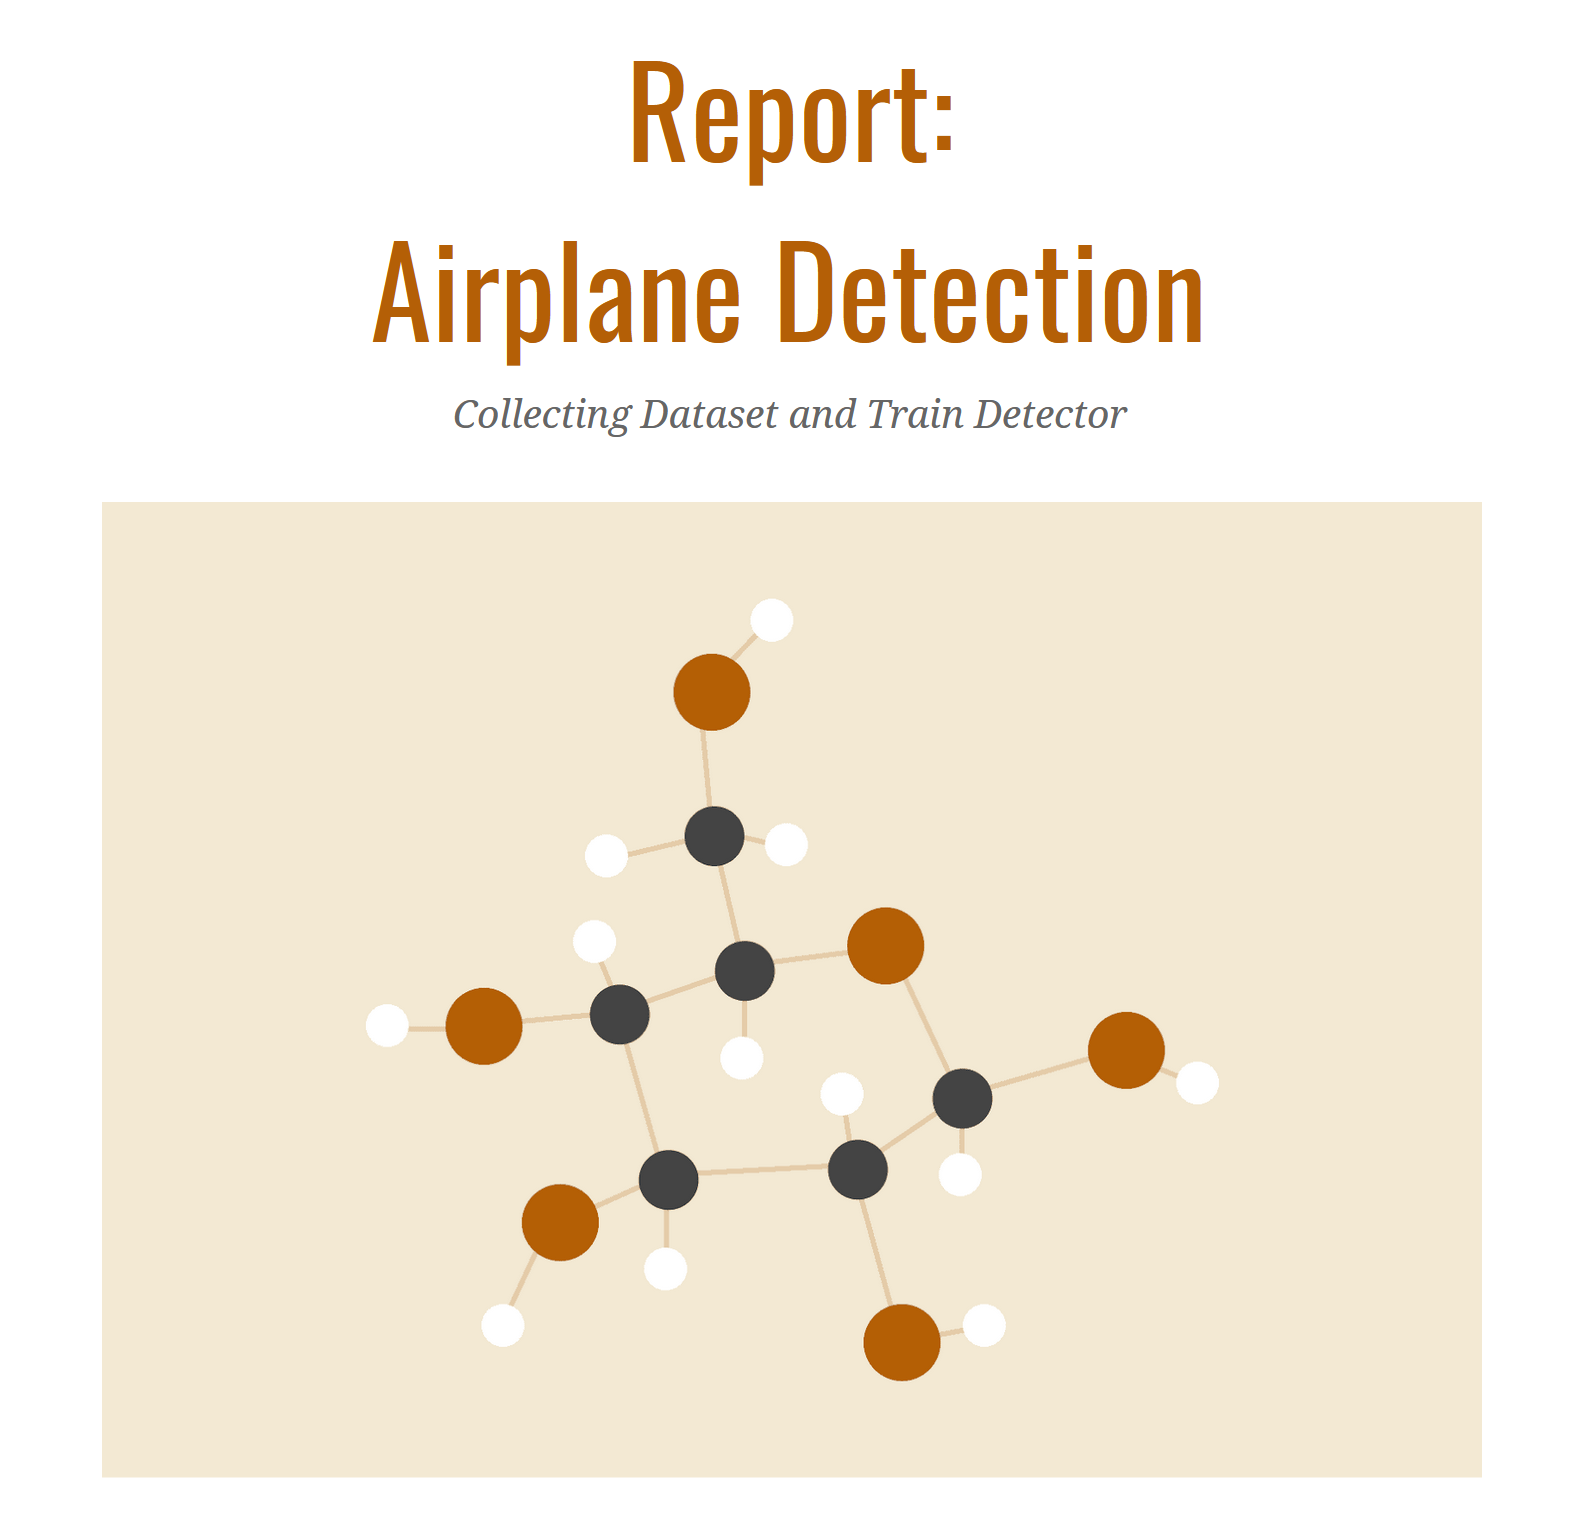

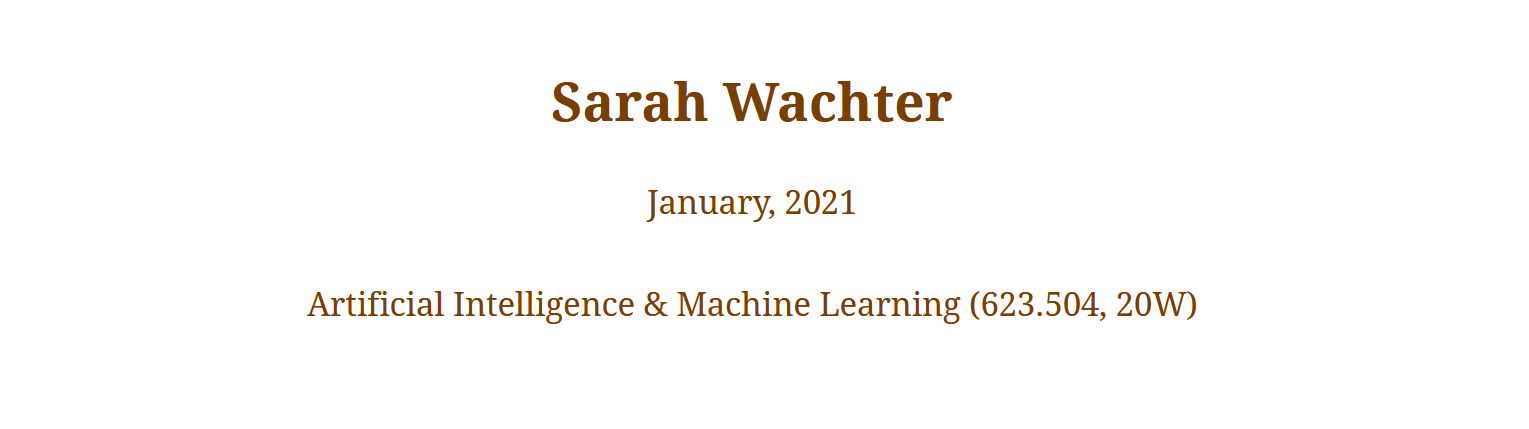


# Part Two: Setup YOLO and Darknet in Google-Colaboratory

## Why Google Colab?

<p align="justify">
After some research I decided to Setup YOLO and Darknet in Google-Colab, because it allows to write and execute python code through the browser. According to 
<a href="https://colab.research.google.com/notebooks/intro.ipynb#">Google</a>
it is especially well suited to machine learning and data analysis. With Google Colab the use is free up to 12 hours at a time and the code is executed on Google`s cloud servers, this means one can use the power of Google hardware, including GPUs and TPUs. The limitation with 12 hours is a handicap, because after that the runtime-environment get destroyed and with it every variable and data which was generated. This is the reason why I connect the VM to my Google-Drive to keep some important data. Before starting the Notebook don`t forget to set the Runtime-Environment to GPU.
</p>

# Download and install needed Libraries, Packages and Dependencies

<p align="justify">
Further Packages are needed: 

*   CUDA - 
*   cuDNN - 
*   git - 
*   libopencv-dev (openCV)
*   Darknet - https://github.com/AlexeyAB/darknet/
*   vim - 
*   GNU Compiler Collections - 
*   tensorflow - 
*   os - 
*   pre-trained darknet-weights - http://pjreddie.com/media/files/darknet53.conv.74
*   darknet scripts for plotting - 

<br/>

Dependencies for openCV
*   cmake 
*   build-essential   
*   libavcodec-dev 
*   libavformat-dev 
*   libswscale-dev  
*   libgtk2.0-dev
*   pkg-config 
*   libavcodec-dev 
*   libavformat-dev 
*   libswscale-d 

cmake is ...
<br/>
dgsfhf
<br/>
dhgdfgjh
<br/>
dhsggcfd
<br/>
NumPy is a package for scientific computing. It provides a multidimensional array object. As the homepage stated:
> NumPy arrays facilitate advanced mathematical and other types of operations on large numbers of data. Typically, such operations are executed more efficiently and with less code than is possible using Python’s built-in sequences.

For further information - please look at the comments in the code.
</p>

In [ ]:
# check current CUDA version to know which cuDNN I have to download 
# !/usr/local/cuda/bin/nvcc --version

In [ ]:
# I`m unzipping the cuDNN files from my Drive folder directly to the VM CUDA folders
# !tar -xzvf '/content/gdrive/MyDrive/AIuML/darknet/cuDNN/cudnn-10.1-linux-x64-v8.0.5.39.tgz' -C '/usr/local/'
# !chmod a+r /usr/local/cuda/include/cudnn.h

In [ ]:
# test the version
#!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

# if not working does this to check if file is there
# !cat /usr/local/cuda/include/cudnn.h

In [ ]:
# This cell imports the drive library and mounts my Google Drive as a VM local drive. I can access to my Drive files 
# using this path "/content/gdrive/MyDrive/"
# I need this because my files are there

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
# Not Necessary cell
# List the content of my drive folder 
!ls '/content/gdrive/MyDrive/yolov3/'

 backup
 cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
 darknet
 darknet_scripts
 generate_train.py
 log2.txt
 obj.data
 obj.names
 obj.zip
'origin label.zip'
'Paper AI.gdoc'
 test1.txt
 yolov3
 yolov3-custom.cfg
 yolov3-custom_word.cfg.gdoc


In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/yolov3/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/yolov3 /mydrive
!ls /mydrive 

 backup
 cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
 darknet
 darknet_scripts
 generate_train.py
 log2.txt
 obj.data
 obj.names
 obj.zip
'origin label.zip'
'Paper AI.gdoc'
 test1.txt
 yolov3
 yolov3-custom.cfg
 yolov3-custom_word.cfg.gdoc


In [ ]:
# update everything to run in no further problems
!apt-get update
!apt-get upgrade

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [1,929 kB]
Hit:14 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease

In [ ]:
# openCV has a lot of dependecies and after a long series of trial and error
# there's some things I need to install first
# install dependencies for openCV
!apt-get install build-essential
!apt-get install cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
git is already the newest version (1:2.17.1-1ubuntu0.7).
libavcodec-dev is already the newest version (7:3.4.8-0ubuntu0.2).
libavcodec-dev set to manually installed.
libavformat-dev is already the newest version (7:3.4.8-0ubuntu0.2).
libavformat-dev set to manually installed.
libswscale-dev is already the newest version (7:3.4.8-0ubuntu0.2).
libswscale-dev set to manually installed.
The following additional packages will be installed:
  autoconf automake autopoint autotools-dev debhelper dh-autoreconf
  dh-strip-nondeterminism file gettext gettext-base gi

In [ ]:
# more things one needs to install
!apt-get install libavcodec-dev libavformat-dev libswscale-d

# install cmake
# CMake is cross-platform free and open-source software for build automation,
# testing and packaging using a compiler-independent method.
# CMake is not a build system but rather it's a build-system generator.
# It supports directory hierarchies and applications that depend on multiple libraries.
!apt-get -y install cmake
!which cmake

!cmake --version

# install OpenCV
!apt-get install libopencv-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libswscale-d
Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
/usr/local/bin/cmake
cmake version 3.12.0

CMake suite maintained and supported by Kitware (kitware.com/cmake).
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libopencv-dev is already the newest version (3.2.0+dfsg-4ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


In [3]:
# git clone Darknet fork from AlexeyAB -> github-Repo
!git clone https://github.com/AlexeyAB/darknet/

Cloning into 'darknet'...
remote: Enumerating objects: 14691, done.
remote: Total 14691 (delta 0), reused 0 (delta 0), pack-reused 14691
Receiving objects: 100% (14691/14691), 13.25 MiB | 7.03 MiB/s, done.
Resolving deltas: 100% (9994/9994), done.


In [ ]:
# install vim because cat throws an error and I want to check if
# I successfully changed the makefile
!apt-get install vim

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libgpm2 vim-common vim-runtime xxd
Suggested packages:
  gpm ctags vim-doc vim-scripts
The following NEW packages will be installed:
  libgpm2 vim vim-common vim-runtime xxd
0 upgraded, 5 newly installed, 0 to remove and 6 not upgraded.
Need to get 6,722 kB of archives.
After this operation, 32.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 xxd amd64 2:8.0.1453-1ubuntu1.4 [49.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 vim-common all 2:8.0.1453-1ubuntu1.4 [70.4 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgpm2 amd64 1.20.7-5 [15.1 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 vim-runtime all 2:8.0.1453-1ubuntu1.4 [5,435 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 vim amd64 2:8.0.1453-

In [5]:
# watch makefile, but don`t forget to stop the cell manually
%cd darknet
#!vim Makefile

/content/darknet


In [ ]:
#Optional
# Download the Yolo-Weights from the official Website
# allos to detect on 80 different classes right from the start
#!ls
#!wget https://pjreddie.com/media/files/yolov3.weights

In [6]:
# edit the makefile to enable opencv support and gpu support with changing to 1
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile

In [ ]:
# check if changing the makefile worked, Don't forget to stop cell manually
#!vim Makefile

In [7]:
# changing to parent directory
%cd ..
!ls

/content
darknet  darknet_scripts  gdrive  sample_data


In [8]:
# g++ command is a GNU c++ compiler invocation command, 
# which is used for preprocessing, compilation, assembly and 
# linking of source code to generate an executable file
# g++  >> command allow us to stop this process at the intermediate stage
!apt install g++-5

# install the 5th version of g++ & gcc
# GNU Compiler Collections which is used to compile mainly C and C++ language.
# gcc  >> command allow us to stop the compilation process at different stages
!apt install gcc-5

# and do the updates
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 10
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 20
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 10
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 20
!update-alternatives --install /usr/bin/cc cc /usr/bin/gcc 30
!update-alternatives --set cc /usr/bin/gcc
!update-alternatives --install /usr/bin/c++ c++ /usr/bin/g++ 30
!update-alternatives --set c++ /usr/bin/g++

Reading package lists... Done
Building dependency tree       
Reading state information... Done
g++-5 is already the newest version (5.5.0-12ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
gcc-5 is already the newest version (5.5.0-12ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


In [ ]:
# I'm unzipping the cuDNN files from my Drive folder directly to the VM CUDA folders
#!tar -xzvf '/content/gdrive/MyDrive/AIuML/darknet/cuDNN/cudnn-10.1-linux-x64-v8.0.5.39.tgz' -C '/usr/local/'
#!chmod a+r /usr/local/cuda/include/cudnn.h
# check if its worked
#!cat /usr/local/cuda/include/cudnn.h

In [9]:
# install CUDA to speed up the performance 
# install it in a different way
!apt update -qq;
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!apt-get update -qq

# install compilers
!apt-get install cuda -y -qq 
# update and install 
!apt update
!apt upgrade
# have to install this too, otherwise its not working
!apt install cuda-8.0 -y

8 packages can be upgraded. Run 'apt list --upgradable' to see them.
--2021-02-22 15:59:23--  https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 152.195.57.194
Connecting to developer.nvidia.com (developer.nvidia.com)|152.195.57.194|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://developer.nvidia.com/compute/cuda/8.0/prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb [following]
--2021-02-22 15:59:24--  https://developer.nvidia.com/compute/cuda/8.0/prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Reusing existing connection to developer.nvidia.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?ohLmUi5p

In [10]:
# make sure that the GPUs are working DONT FORGET TO SWITCH NOTEBOOK on GPU!!!!
import tensorflow as tf
gpu_device_name = tf.test.gpu_device_name()
print(gpu_device_name)
print("is working?!")

# check cuda version
!/usr/local/cuda/bin/nvcc --version

/device:GPU:0
is working?!
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2016 NVIDIA Corporation
Built on Tue_Jan_10_13:22:03_CST_2017
Cuda compilation tools, release 8.0, V8.0.61


In [11]:
# after everything got installed: and changing the makefile
# --> run the make command
# buil darknet and installing all the dependencies from the binary files
%cd darknet
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1424:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^
./src/image_opencv.cpp:1400:9: warning: unused variable ‘it_tb_res’ [-Wunused-variable]
     int it_tb

In [12]:
!ls
#check if everything works by running it on a test image
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

3rdparty	darknet			include		       results
backup		DarknetConfig.cmake.in	json_mjpeg_streams.sh  scripts
build		darknet_images.py	LICENSE		       src
build.ps1	darknet.py		Makefile	       vcpkg.json
build.sh	darknet_video.py	net_cam_v3.sh	       video_yolov3.sh
cfg		data			net_cam_v4.sh	       video_yolov4.sh
cmake		image_yolov3.sh		obj
CMakeLists.txt	image_yolov4.sh		README.md
 CUDA-version: 8000 (11020), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 

In [13]:
#defining some functions that will -> show images, and upload and 
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)



In [ ]:
# there
#imShow('predictions.jpg')

In [ ]:
# run darknet command with google drive image (my path to thge example image is /darknet/pictures/airplane_0.jpg)
# to check if this is working
%cd darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights /mydrive/darknet/pictures/airplane_0.jpg > /mydrive/test1.txt
#imShow('predictions.jpg')

[Errno 20] Not a directory: 'darknet'
/content/darknet_scripts/darknet
 CUDA-version: 8000 (11020), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64     

In [ ]:
# GOOGLE DRIVE DOWNLOAD to have the results - dont forget collab will be deleted after 12 hours
# change the image name - how it will be saved as 
!cp predictions.jpg /mydrive/images/detection1.jpg

cp: cannot stat 'predictions.jpg': No such file or directory


In [ ]:
## Start to train my model
# state class in ...

In [14]:
# this is where the zip with the pictures and txt files is stored
!ls /mydrive/yolov3

 backup
 cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
 darknet
 darknet_scripts
 generate_train.py
 log2.txt
 obj.data
 obj.names
 obj.zip
'origin label.zip'
'Paper AI.gdoc'
 test1.txt
 yolov3
 yolov3-custom.cfg
 yolov3-custom_word.cfg.gdoc


In [15]:
# copy the zip file into the root directory of the VM, Zip because faster transfer 
!cp /mydrive/yolov3/obj.zip ../

In [16]:
# unzip the zip file and its contents (images & txt) should now be
# in /darknet/data/obj
!unzip ../obj.zip -d data/

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
  inflating: data/labels/airplane_1332.txt  
  inflating: data/labels/airplane_1333.jpg  
  inflating: data/labels/airplane_1333.txt  
  inflating: data/labels/airplane_1334.jpg  
  inflating: data/labels/airplane_1334.txt  
  inflating: data/labels/airplane_1335.jpg  
  inflating: data/labels/airplane_1335.txt  
  inflating: data/labels/airplane_1336.jpg  
  inflating: data/labels/airplane_1336.txt  
  inflating: data/labels/airplane_1337.jpg  
  inflating: data/labels/airplane_1337.txt  
  inflating: data/labels/airplane_1338.jpg  
  inflating: data/labels/airplane_1338.txt  
  inflating: data/labels/airplane_1339.jpg  
  inflating: data/labels/airplane_1339.txt  
  inflating: data/labels/airplane_134.jpg  
  inflating: data/labels/airplane_134.txt  
  inflating: data/labels/airplane_1340.jpg  
  inflating: data/labels/airplane_1340.txt  
  inflating: data/labels/airplane_1341.jpg  
  inflating: data/labels/airplane_1

In [ ]:
# First change the Yolov3 config File
# darknet --> cfg --> yolov3.cfg

# 1.
# commend testing: batch & subdivisions lines!
# uncommend Training-Lines
# batch=64
# subdivisions=16    --> if there`s a CUDA Error then rise 16 - 32 if this is 
# still not working then up tp 64!

# 2.
# change max_batches  --> how many times our training is going to run through
# the data: its like 2000 * classes you have (we have just one - airplane, 
# but the minimum should be 4000 - for enough time to train the model) 

# 3. 
# change steps to 80% of the max batches and 90 % of the mac batches
# our case: steps=3200,3600

# Step 4. and 5. for EVERY YOLO-Layer in the cfg file  (3 layers!)

# 4.
# [yolo] --> this defines our yolo-layers within our network
# set Classes 80 to 1 (airplane)

# 5.
# [convolutional] 
# change the filters from 255 to 18
# according to this equation:
# filters = (classes +5) *3  [convolutional] before each [yolo] layer
# classes=1 --> filters = 18  (classes 3 -> filters = 24)

# 6. (optional) if you`re getting a out of memory error
# ctrl + F (random)
# setting each random to 0!
# because random 1 resize every image as it trains it
# that it doesnt overfit 416x416 image
# because it resizes every image before the training

# Finally
# save file as yolov3-custom.cfg

In [ ]:
# Create new files:
# obj.names  -> with our name in it for the class  (airplane)
# obj.data  -> to specifiy:
# how many classes
# where to find our training data...
# 
#classes = 1
#train = data/train.txt   Path from the root of the yolov3 folder
#valid = data/test.txt    Name of the images to use for training/testing
#names = data/obj.names   
#backup = /mydrive/yolov3/backup/   --> to save our custom weights! Create this folder!

In [17]:
# upload the obj.names and obj.data files to the cloud VM from Google Drive
!cp /mydrive/yolov3/obj.names ./data
!cp /mydrive/yolov3/obj.data  ./data

In [18]:
# upload also the custom.config to the VM
!cp /mydrive/yolov3/yolov3-custom.cfg  ./cfg

In [19]:
# Generating the train.txt --> has to be filled with the relative paths to the pictures
# check before if darknet/data/obj exists
import os

image_files = []
os.chdir(os.path.join("data", "labels"))
for filename in os.listdir(os.getcwd()):
    if filename.endswith(".jpg"):
        image_files.append("data/labels/" + filename)
os.chdir("..")
with open("train.txt", "w") as outfile:
    for image in image_files:
        outfile.write(image)
        outfile.write("\n")
    outfile.close()
os.chdir("..")

In [20]:
# verify if train.txt is now in the data folder
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.names	     train.txt
coco9k.map  giraffe.jpg  imagenet.shortnames.list  openimages.names  voc.names
coco.names  goal.txt	 labels			   person.jpg
dog.jpg     horses.jpg	 obj.data		   scream.jpg


In [21]:
# Download pre-trained weights for the convolutional layers
# after some research I found out that  the convolutional layers of the
# YOLOv3 network (weights) help that my custom object detector has to be trained 
# less and is more accurate --> helps model to converge - automatically scopes 
# out the model architecture for me, model doesn`t have to start from the scratch
# it`s building off of these weights which are neraly optimal for each layer
# it`s not like the weights to detect the classes ! the layers themselves will 
# learn these weights over time we just use this one, that the model doesn`t have
# to learn them
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2021-02-22 16:02:31--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  23.0MB/s    in 11s     

2021-02-22 16:02:43 (14.1 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
# Create Link to Folder for Chart png - only at first run
# !ln -s "/mydrive/yolov3/charts" charts 

In [22]:
# change the saving path of charts. It will look for the string 'chart.png' in image_opencv.cpp file 
# and change it to charts/chart.png. Charts is the directory that we linked in the previous command.
!sed -i 's/chart.png/charts\/chart.png/g' src/image_opencv.cpp

In [ ]:
######## START Training my custom Yolov3 airplane detector

In [ ]:
# (dont_show flag stops a chart from popping up since cloud can't open images on the spot)
# RUN the training
!./darknet detector train ./data/obj.data ./cfg/yolov3-custom.cfg darknet53.conv.74 -dont_show -map > /mydrive/log.txt

# Resume Training after Timeout
# !./darknet detector train data/obj.data cfg/yolov3-custom.cfg /mydrive/yolov3/backup/yolov3-custom_last.weights -map -dont_show > /mydrive/log3.txt

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.356574), count: 4, class_loss = 1.271198, iou_loss = 2.262428, total_loss = 3.533626 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.384663), count: 2, class_loss = 0.598746, iou_loss = 0.994451, total_loss = 1.593197 
 total_bbox = 33506, rewritten_bbox = 0.232794 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.557744), count: 3, class_loss = 0.846500, iou_loss = 0.865392, total_loss = 1.711892 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.427054), count: 1, class_loss = 0.386577, iou_loss = 0.336676, total_loss = 0.723252 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.018857, iou_loss = 0.000000, total_loss = 0.018857 
 total_bbox = 33510, rewritten_bbox = 0.2

In [ ]:
#imShow('chart.png')

!ls -a

#!vim /mydrive/yolov3/backup/log.txt
!ls -a /mydrive/yolov3/backup





In [ ]:
# Try to show the plot of training loss 
# therefore clone the darknet repo and run the python script
%cd /mydrive

/content/gdrive/My Drive/yolov3


In [ ]:
#!git clone https://github.com/vovaekb/darknet_scripts.git

fatal: destination path 'darknet_scripts' already exists and is not an empty directory.


In [ ]:
# change into right folder and run the script
%cd darknet_scripts/

/content/gdrive/My Drive/yolov3/darknet_scripts


In [ ]:
#finally run the script
!python plot_yolo_log.py /mydrive/yolov3/log.txt

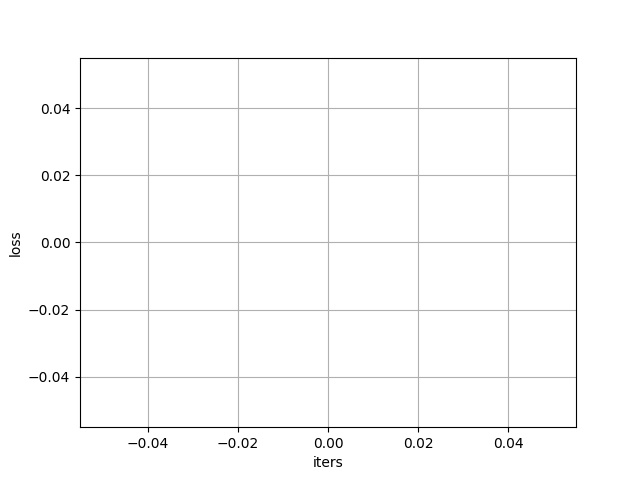

In [ ]:
# this scripts generates loss_plot.jpg  -> show it
%matplotlib inline
from IPython.display import Image

Image('./loss_plot.jpg')

In [ ]:
!ls /mydrive/yolov3/backup

log.txt			    yolov3-custom_4000.weights
yolov3-custom_1000.weights  yolov3-custom_final.weights
yolov3-custom_2000.weights  yolov3-custom_last.weights
yolov3-custom_3000.weights


In [ ]:
!cp ./darknet_scripts /mydrive/yolov3

cp: cannot stat './darknet_scripts': No such file or directory
